# Importing the Header Files
1. Imported the Tensorflow Keras Modules
2. Imported the Numpy and Opencv Modules
3. Imported Random and OS Modules

In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Storing the Path of the Datasets and shuffling them randomly

In [13]:
path=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
       # print(filename
        #print(filename)
        if filename!='.DS_Store' and os.path.join(dirname, filename).count('__MACOSX')==0:
            path.append(os.path.join(dirname, filename))
            #print(os.path.join(dirname, filename))
random.seed(42)
random.shuffle(path)

# Stroing the Datasets in the Container Variable along with its Label

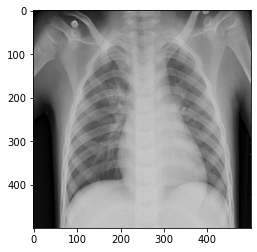

In [14]:
Y=[]
img_data=[]
for i in range(1000):
    if path[i].count('PNEUMONIA')>0:
#         if path[i].count('virus')>0:
          Y.append(float(1))
#         else:
#             Y.append(float(2))
    else:
        Y.append(float(0))
    img_read=cv2.imread(path[i])
    img_read=cv2.resize(img_read,(500,500))
    img_data.append(img_read)
plt.imshow(img_read)
img_data=np.asarray(img_data)
Y=np.asarray(Y)

# Dense Layer (DNN) Implementation

In [15]:
model = Sequential()
model.add( keras.layers.Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(img_data,Y, epochs=5)
_, accuracy = model.evaluate(img_data, Y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/5
32/32 [==============================] - 3s 98ms/step - loss: 181521.7344 - accuracy: 0.7190
Epoch 2/5
32/32 [==============================] - 3s 95ms/step - loss: 0.6603 - accuracy: 0.7400
Epoch 3/5
32/32 [==============================] - 3s 100ms/step - loss: 0.6417 - accuracy: 0.7400
Epoch 4/5
32/32 [==============================] - 3s 97ms/step - loss: 0.6270 - accuracy: 0.7400
Epoch 5/5
32/32 [==============================] - 2s 58ms/step - loss: 0.6112 - accuracy: 0.7400
Accuracy: 74.00


# CNN Implementation with VGG16 Architecture

In [18]:
EPOCHS = 9
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (96, 96, 3)
model=Sequential()
model.add(Conv2D(32, (3, 3), padding="same",
input_shape=(500,500,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("[INFO] training network...")
model.fit(x=img_data,y=Y, batch_size=1,steps_per_epoch=len(img_data)//BS,epochs=EPOCHS, verbose=1)
_, accuracy = model.evaluate(img_data, Y)
print('Accuracy: %.2f' % (accuracy*100))

[INFO] training network...
Epoch 1/9
31/31 [==============================] - 18s 584ms/step - loss: 71.5808 - accuracy: 0.7419
Epoch 2/9
31/31 [==============================] - 19s 603ms/step - loss: 45.3998 - accuracy: 0.7742
Epoch 3/9
31/31 [==============================] - 18s 577ms/step - loss: 9.2737 - accuracy: 0.8387
Epoch 4/9
31/31 [==============================] - 17s 547ms/step - loss: 31.0367 - accuracy: 0.8710
Epoch 5/9
31/31 [==============================] - 18s 596ms/step - loss: 7.8636 - accuracy: 0.8710
Epoch 6/9
31/31 [==============================] - 17s 555ms/step - loss: 29.2529 - accuracy: 0.8710
Epoch 7/9
31/31 [==============================] - 17s 556ms/step - loss: 14.8779 - accuracy: 0.8710
Epoch 8/9
31/31 [==============================] - 18s 577ms/step - loss: 25.5818 - accuracy: 0.8710
Epoch 9/9
32/32 [==============================] - 72s 2s/step - loss: 12.8403 - accuracy: 0.8430
Accuracy: 84.30
